In [33]:
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
import numpy as np
import operator



In [34]:
df = pd.read_csv('C:\\Users\\FloMartin-ResolveMin\\Desktop\\git\\EDA-using-Python\\train.csv')
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [35]:
df.info

<bound method DataFrame.info of         Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0        1          60       RL         65.0     8450   Pave   NaN      Reg   
1        2          20       RL         80.0     9600   Pave   NaN      Reg   
2        3          60       RL         68.0    11250   Pave   NaN      IR1   
3        4          70       RL         60.0     9550   Pave   NaN      IR1   
4        5          60       RL         84.0    14260   Pave   NaN      IR1   
...    ...         ...      ...          ...      ...    ...   ...      ...   
1455  1456          60       RL         62.0     7917   Pave   NaN      Reg   
1456  1457          20       RL         85.0    13175   Pave   NaN      Reg   
1457  1458          70       RL         66.0     9042   Pave   NaN      Reg   
1458  1459          20       RL         68.0     9717   Pave   NaN      Reg   
1459  1460          20       RL         75.0     9937   Pave   NaN      Reg   

     LandContour Ut

In [36]:
# drop null values 

threshold = 0.3 #threshold for the minimum non-null values 

df2 = df.dropna(axis=1, thresh=int(threshold*len(df))) #dropna() method to remove columns where the number of non-null values is below the specified threshold.
df2 = df2.drop(columns=['Id'], errors = 'ignore') #use drop to explicitly remove the 'Id' column if it exists.

dropped_columns = set(df.columns)-set(df2.columns) ## List dropped columns
print("List of dropped columns:", ", ".join(dropped_columns))
print('\n')

df = df2

List of dropped columns: PoolQC, Id, MiscFeature, Alley, Fence




count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64


C:\Users\FloMartin-ResolveMin\AppData\Local\Temp\ipykernel_24832\419029210.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sn.distplot(df["SalePrice"], color='g', bins=100, hist_kws={'alpha':0.4})


<Axes: xlabel='SalePrice', ylabel='Density'>

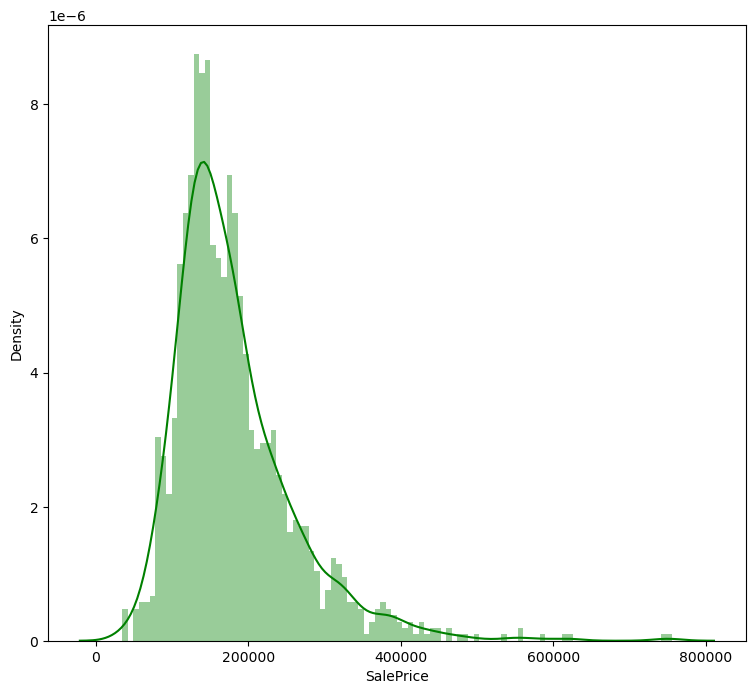

In [37]:
# visualize the distribution and characteristics of the 'SalePrice' variable in the dataset

print(df['SalePrice'].describe())
plt.figure(figsize=(9,8))
sn.distplot(df["SalePrice"], color='g', bins=100, hist_kws={'alpha':0.4})


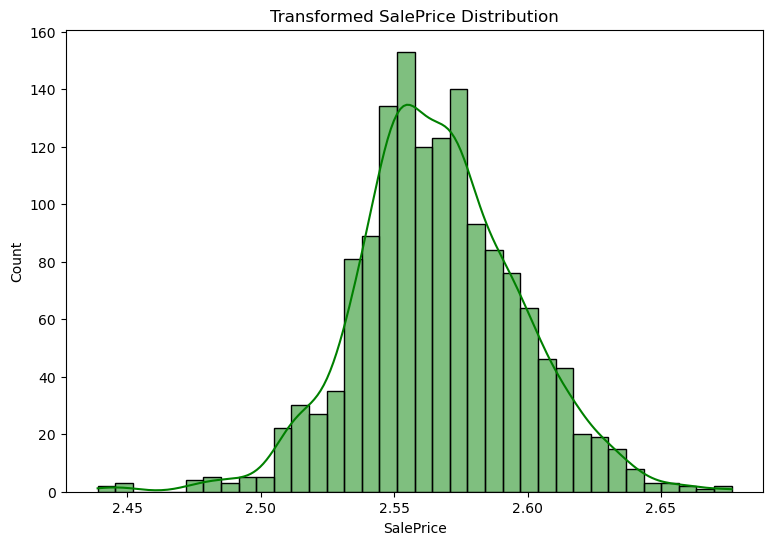

In [39]:
# logarithmic transformation

df['SalePrice'] = np.log1p(df['SalePrice'])

plt.figure(figsize=(9, 6))
sn.histplot(df['SalePrice'], kde=True, color='g')
plt.title('Transformed SalePrice Distribution')
plt.show()


In [40]:
# Numerical data distribution, all features by taking only the numerical values in the dataset

list(set(df.dtypes.tolist()))

[dtype('float64'), dtype('O'), dtype('int64')]

In [41]:
df_num = df.select_dtypes(include= ['float64', 'int64'])
df_num.head

<bound method NDFrame.head of       MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  YearBuilt  \
0             60         65.0     8450            7            5       2003   
1             20         80.0     9600            6            8       1976   
2             60         68.0    11250            7            5       2001   
3             70         60.0     9550            7            5       1915   
4             60         84.0    14260            8            5       2000   
...          ...          ...      ...          ...          ...        ...   
1455          60         62.0     7917            6            5       1999   
1456          20         85.0    13175            6            6       1978   
1457          70         66.0     9042            7            9       1941   
1458          20         68.0     9717            5            6       1950   
1459          20         75.0     9937            5            6       1965   

      YearRemodAdd  M

array([[<Axes: title={'center': 'MSSubClass'}>,
        <Axes: title={'center': 'LotFrontage'}>,
        <Axes: title={'center': 'LotArea'}>,
        <Axes: title={'center': 'OverallQual'}>,
        <Axes: title={'center': 'OverallCond'}>,
        <Axes: title={'center': 'YearBuilt'}>],
       [<Axes: title={'center': 'YearRemodAdd'}>,
        <Axes: title={'center': 'MasVnrArea'}>,
        <Axes: title={'center': 'BsmtFinSF1'}>,
        <Axes: title={'center': 'BsmtFinSF2'}>,
        <Axes: title={'center': 'BsmtUnfSF'}>,
        <Axes: title={'center': 'TotalBsmtSF'}>],
       [<Axes: title={'center': '1stFlrSF'}>,
        <Axes: title={'center': '2ndFlrSF'}>,
        <Axes: title={'center': 'LowQualFinSF'}>,
        <Axes: title={'center': 'GrLivArea'}>,
        <Axes: title={'center': 'BsmtFullBath'}>,
        <Axes: title={'center': 'BsmtHalfBath'}>],
       [<Axes: title={'center': 'FullBath'}>,
        <Axes: title={'center': 'HalfBath'}>,
        <Axes: title={'center': 'Bedroo

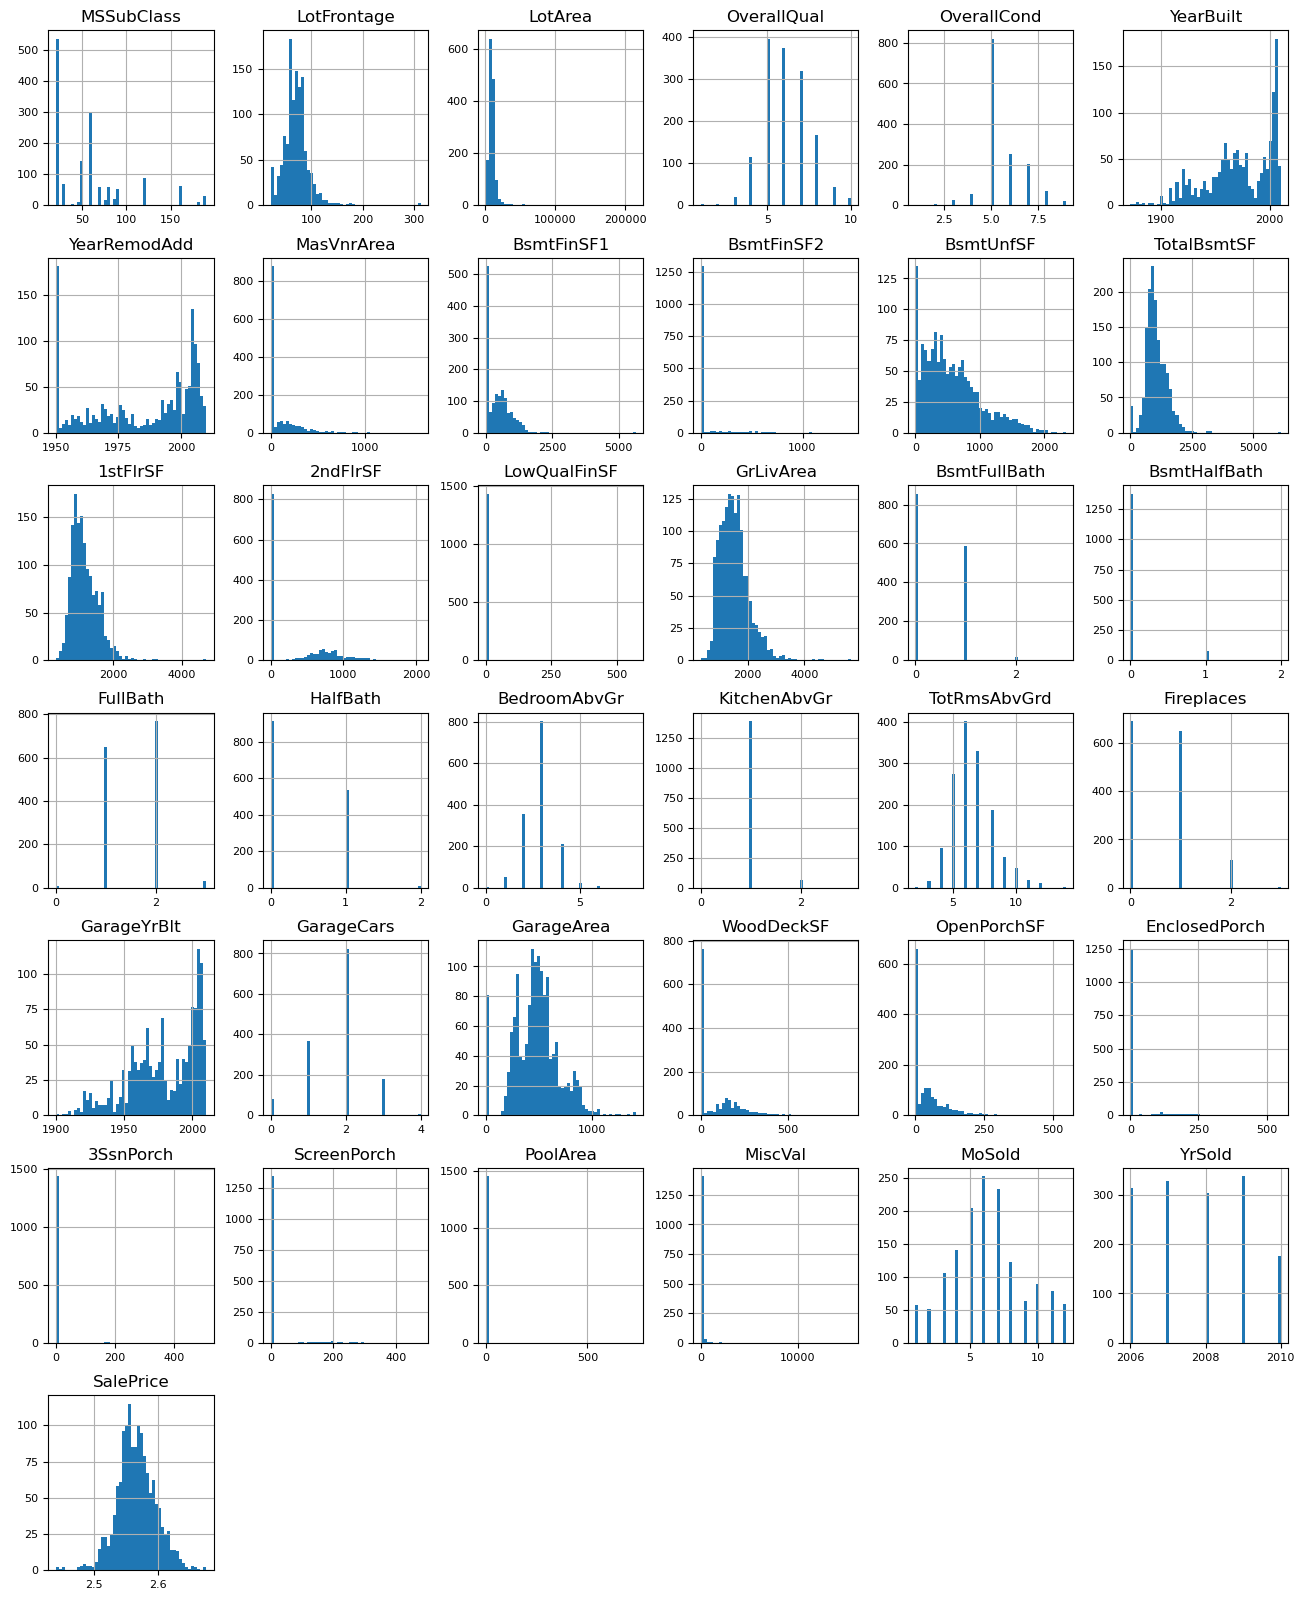

In [42]:
df_num.hist(figsize=(16,20), bins=50, xlabelsize=8, ylabelsize=8)

In [43]:
# correlation with SalePrice and create a new variable

df_num_corr = df_num.corr()['SalePrice'][:-1]
best_list = df_num_corr[abs(df_num_corr) > 0.5].sort_values(ascending=False)
print('There is {} strongly correlated values with SalePrice:\n{}'.format(len(best_list), best_list))





There is 11 strongly correlated values with SalePrice:
OverallQual     0.815005
GrLivArea       0.697001
GarageCars      0.680156
GarageArea      0.649601
TotalBsmtSF     0.609138
FullBath        0.593950
1stFlrSF        0.593533
YearBuilt       0.587947
YearRemodAdd    0.566811
GarageYrBlt     0.542620
TotRmsAbvGrd    0.532015
Name: SalePrice, dtype: float64


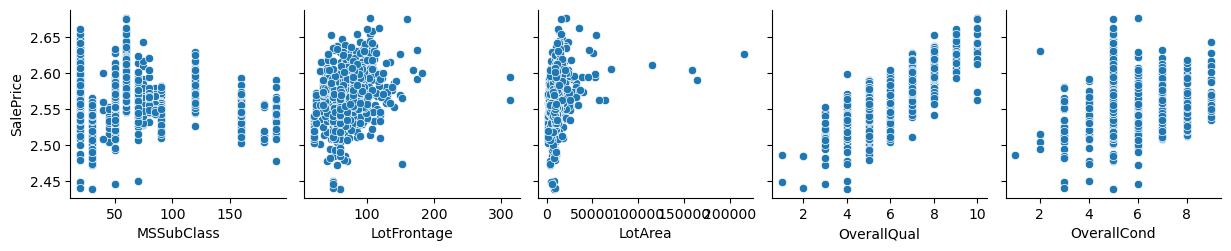

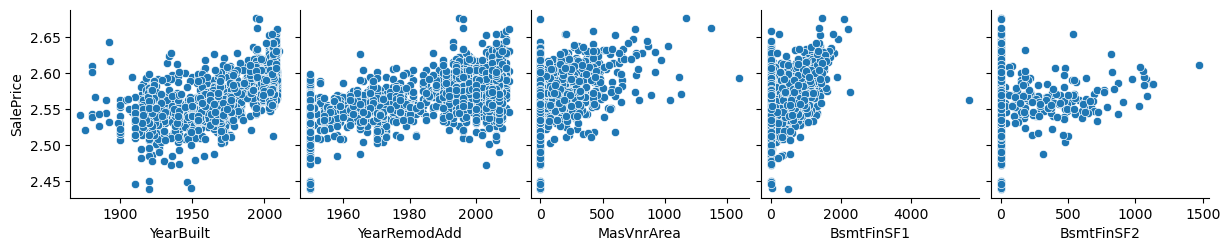

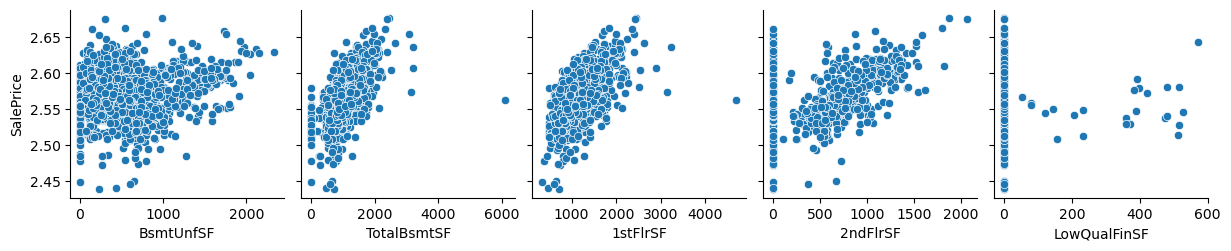

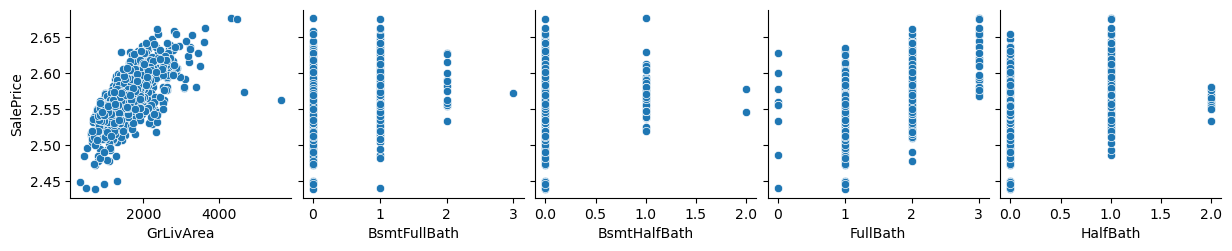

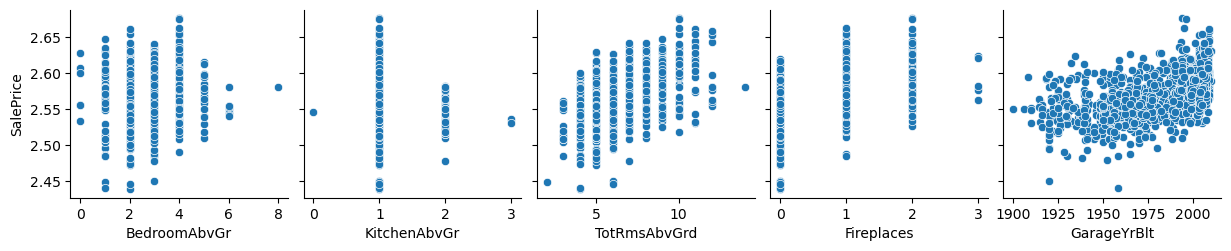

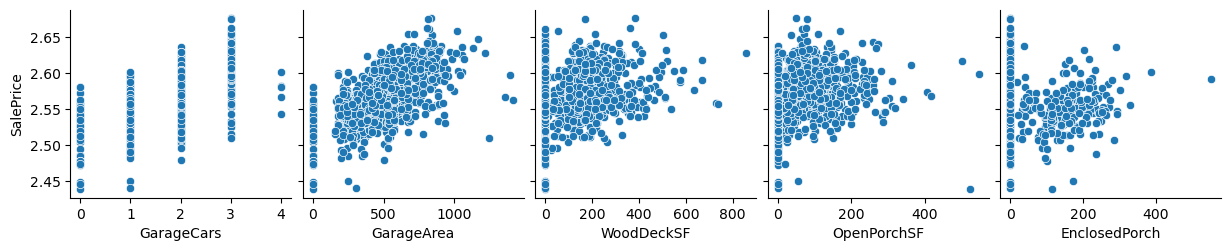

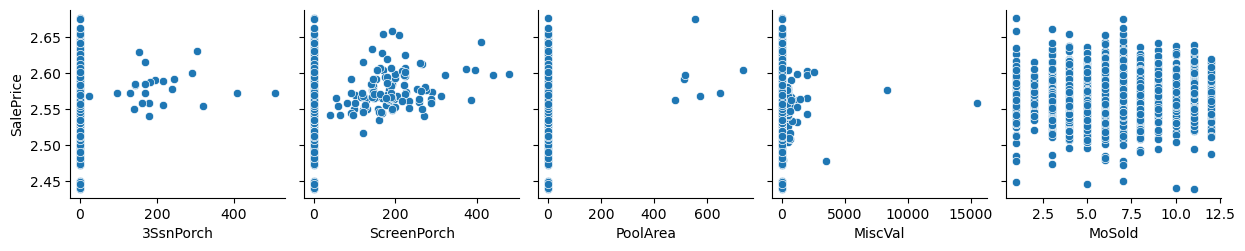

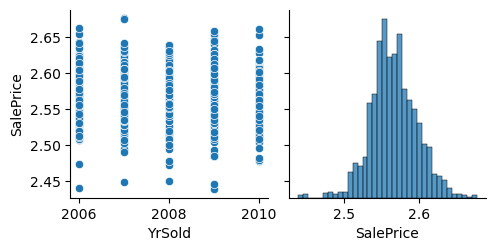

In [44]:
# Plot the numerical features and see which ones have very few or explainable outliers

for i in range(0, len(df_num.columns), 5):
    sn.pairplot(data=df_num,
                x_vars=df_num.columns[i:i+5],
                y_vars=['SalePrice'])

In [45]:
# We can clearly identify some relationships. Most of them seems to have a linear relationship with the SalePrice and if we look closely at the data we can see that a lot of data points are located on x = 0 which may indicate the absence of such feature in the house.

# empty list to store the correlations

correlations = []

# iterate through numeric columns except the last one "saleprice"
for col in df_num.columns[:-1]:     
    non_zero_rows = df_num[df_num[col] !=0]
    correlation = non_zero_rows[col].corr(non_zero_rows['SalePrice'])
    correlations.append((col, correlation))

# sort the correlations in ascending order
sorted_correlations = sorted(correlations, key=lambda x: x[1])

# print the sorted correlations
for feature, correlation in sorted_correlations:
    print(f'{feature:>15}: {correlation:>15}')

    



   KitchenAbvGr: -0.1505800717955143
       HalfBath: -0.08876504686330441
     MSSubClass: -0.07245969479703634
         YrSold: -0.03789718439717815
    OverallCond: -0.032208376174526675
   BsmtHalfBath: -0.02518313971316279
   BsmtFullBath: 0.020085346141180366
         MoSold: 0.05741961992536962
    OpenPorchSF: 0.062199363857925065
       PoolArea: 0.06255618777225545
      3SsnPorch: 0.0676573112065856
        MiscVal: 0.085766094755122
     Fireplaces: 0.10475625988505777
      BsmtUnfSF: 0.16855656741537267
     WoodDeckSF: 0.20104844891518614
     BsmtFinSF2: 0.20394128783336116
   LowQualFinSF: 0.22457407935773294
   BedroomAbvGr: 0.22483390234957834
  EnclosedPorch: 0.2462063086640103
        LotArea: 0.25538197759995285
    ScreenPorch: 0.30901593412983247
    LotFrontage: 0.35431485388703016
     MasVnrArea: 0.3741021749050995
     BsmtFinSF1: 0.4460112565840433
   TotRmsAbvGrd: 0.532015113250122
    GarageYrBlt: 0.5426202467260194
   YearRemodAdd: 0.5668107397742405
   

In [46]:

df_num_corr_v2 = df_num.corr()['SalePrice'][:-1]
best_list = df_num_corr_v2[abs(df_num_corr_v2) > 0.5].sort_values(ascending=False)
print('There is {} strongly correlated values with SalePrice:\n{}'.format(len(best_list), best_list))

There is 11 strongly correlated values with SalePrice:
OverallQual     0.815005
GrLivArea       0.697001
GarageCars      0.680156
GarageArea      0.649601
TotalBsmtSF     0.609138
FullBath        0.593950
1stFlrSF        0.593533
YearBuilt       0.587947
YearRemodAdd    0.566811
GarageYrBlt     0.542620
TotRmsAbvGrd    0.532015
Name: SalePrice, dtype: float64


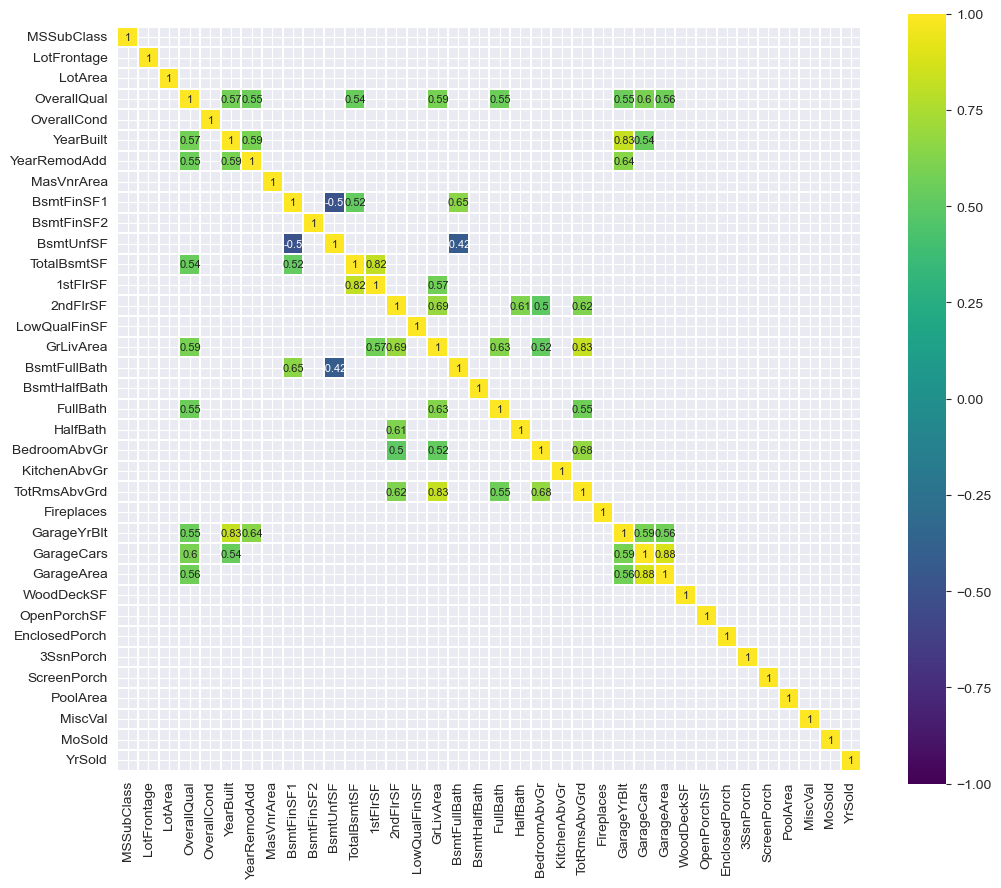

In [48]:
# feature to feature relationship

corr = df_num.drop('SalePrice', axis=1).corr() # We already examined SalePrice correlations
sn.set_style("darkgrid")
plt.figure(figsize=(12, 10))

sn.heatmap(corr[(corr >= 0.5) | (corr <= -0.4)], 
            cmap='viridis', vmax=1.0, vmin=-1.0, linewidths=0.1,
            annot=True, annot_kws={"size": 8}, square=True);

In [49]:
# Q -> Q (Quantitative to Quantitative relationship)

#Let's now examine the quantitative features of our dataframe and how they relate to the SalePrice which is also quantitative (hence the relation Q -> Q)

quantitative_features_list = ['LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'TotalBsmtSF', '1stFlrSF',
    '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
    'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 
    'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'SalePrice']
df_quantitative_values = df[quantitative_features_list]
df_quantitative_values.head()

,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,...,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,SalePrice
0,65.0,8450,196.0,706,0,856,856,854,0,1710,...,2,548,0,61,0,0,0,0,0,2.583824
1,80.0,9600,0.0,978,0,1262,1262,0,0,1262,...,2,460,298,0,0,0,0,0,0,2.573300
2,68.0,11250,162.0,486,0,920,920,866,0,1786,...,2,608,0,42,0,0,0,0,0,2.589054
3,60.0,9550,0.0,216,0,756,961,756,0,1717,...,3,642,0,35,272,0,0,0,0,2.553297
4,84.0,14260,350.0,655,0,1145,1145,1053,0,2198,...,3,836,192,84,0,0,0,0,0,2.597433


In [50]:
features_to_analyse = [x for x in quantitative_features_list if x in best_list]
features_to_analyse.append('SalePrice')
features_to_analyse

['TotalBsmtSF',
 '1stFlrSF',
 'GrLivArea',
 'FullBath',
 'TotRmsAbvGrd',
 'GarageCars',
 'GarageArea',
 'SalePrice']

In [51]:
# C -> Q (Categorical to Quantitative relationship)

# Identify quantitative features
quantitative_features_list = ['LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'TotalBsmtSF', '1stFlrSF',
    '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
    'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 
    'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'SalePrice']

# Identify categorical features
categorical_features = [col for col in df.columns if col not in quantitative_features_list]

# Create DataFrames for quantitative and categorical features
df_quantitative = df[quantitative_features_list]
df_categorical = df[categorical_features]

# Display the first few rows of each DataFrame
print("Quantitative Features:")
print(df_quantitative.head())

print("\nCategorical Features:")
print(df_categorical.head())

Quantitative Features:
   LotFrontage  LotArea  MasVnrArea  BsmtFinSF1  BsmtFinSF2  TotalBsmtSF  \
0         65.0     8450       196.0         706           0          856   
1         80.0     9600         0.0         978           0         1262   
2         68.0    11250       162.0         486           0          920   
3         60.0     9550         0.0         216           0          756   
4         84.0    14260       350.0         655           0         1145   

   1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  ...  GarageCars  GarageArea  \
0       856       854             0       1710  ...           2         548   
1      1262         0             0       1262  ...           2         460   
2       920       866             0       1786  ...           2         608   
3       961       756             0       1717  ...           3         642   
4      1145      1053             0       2198  ...           3         836   

   WoodDeckSF  OpenPorchSF  EnclosedPorch  3S

In [52]:
df_not_num = df_categorical.select_dtypes(include = ['O'])
print('There is {} non numerical features including:\n{}'.format(len(df_not_num.columns), df_not_num.columns.tolist()))

There is 39 non numerical features including:
['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'SaleType', 'SaleCondition']


C:\Users\FloMartin-ResolveMin\AppData\Local\Temp\ipykernel_24832\4181014034.py:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.xaxis.get_majorticklabels(), rotation=45)
C:\Users\FloMartin-ResolveMin\AppData\Local\Temp\ipykernel_24832\4181014034.py:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.xaxis.get_majorticklabels(), rotation=45)
C:\Users\FloMartin-ResolveMin\AppData\Local\Temp\ipykernel_24832\4181014034.py:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.xaxis.get_majorticklabels(), rotation=45)
C:\Users\FloMartin-ResolveMin\AppData\Local\Temp\ipykernel_24832\4181014034.py:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.xaxis.get_majorticklabels(), rotation=45)
C:\Users\FloMartin-ResolveMin\AppData\Local\Temp\ipykernel_24832\4181014034.py:5: UserWarning: FixedFormatte

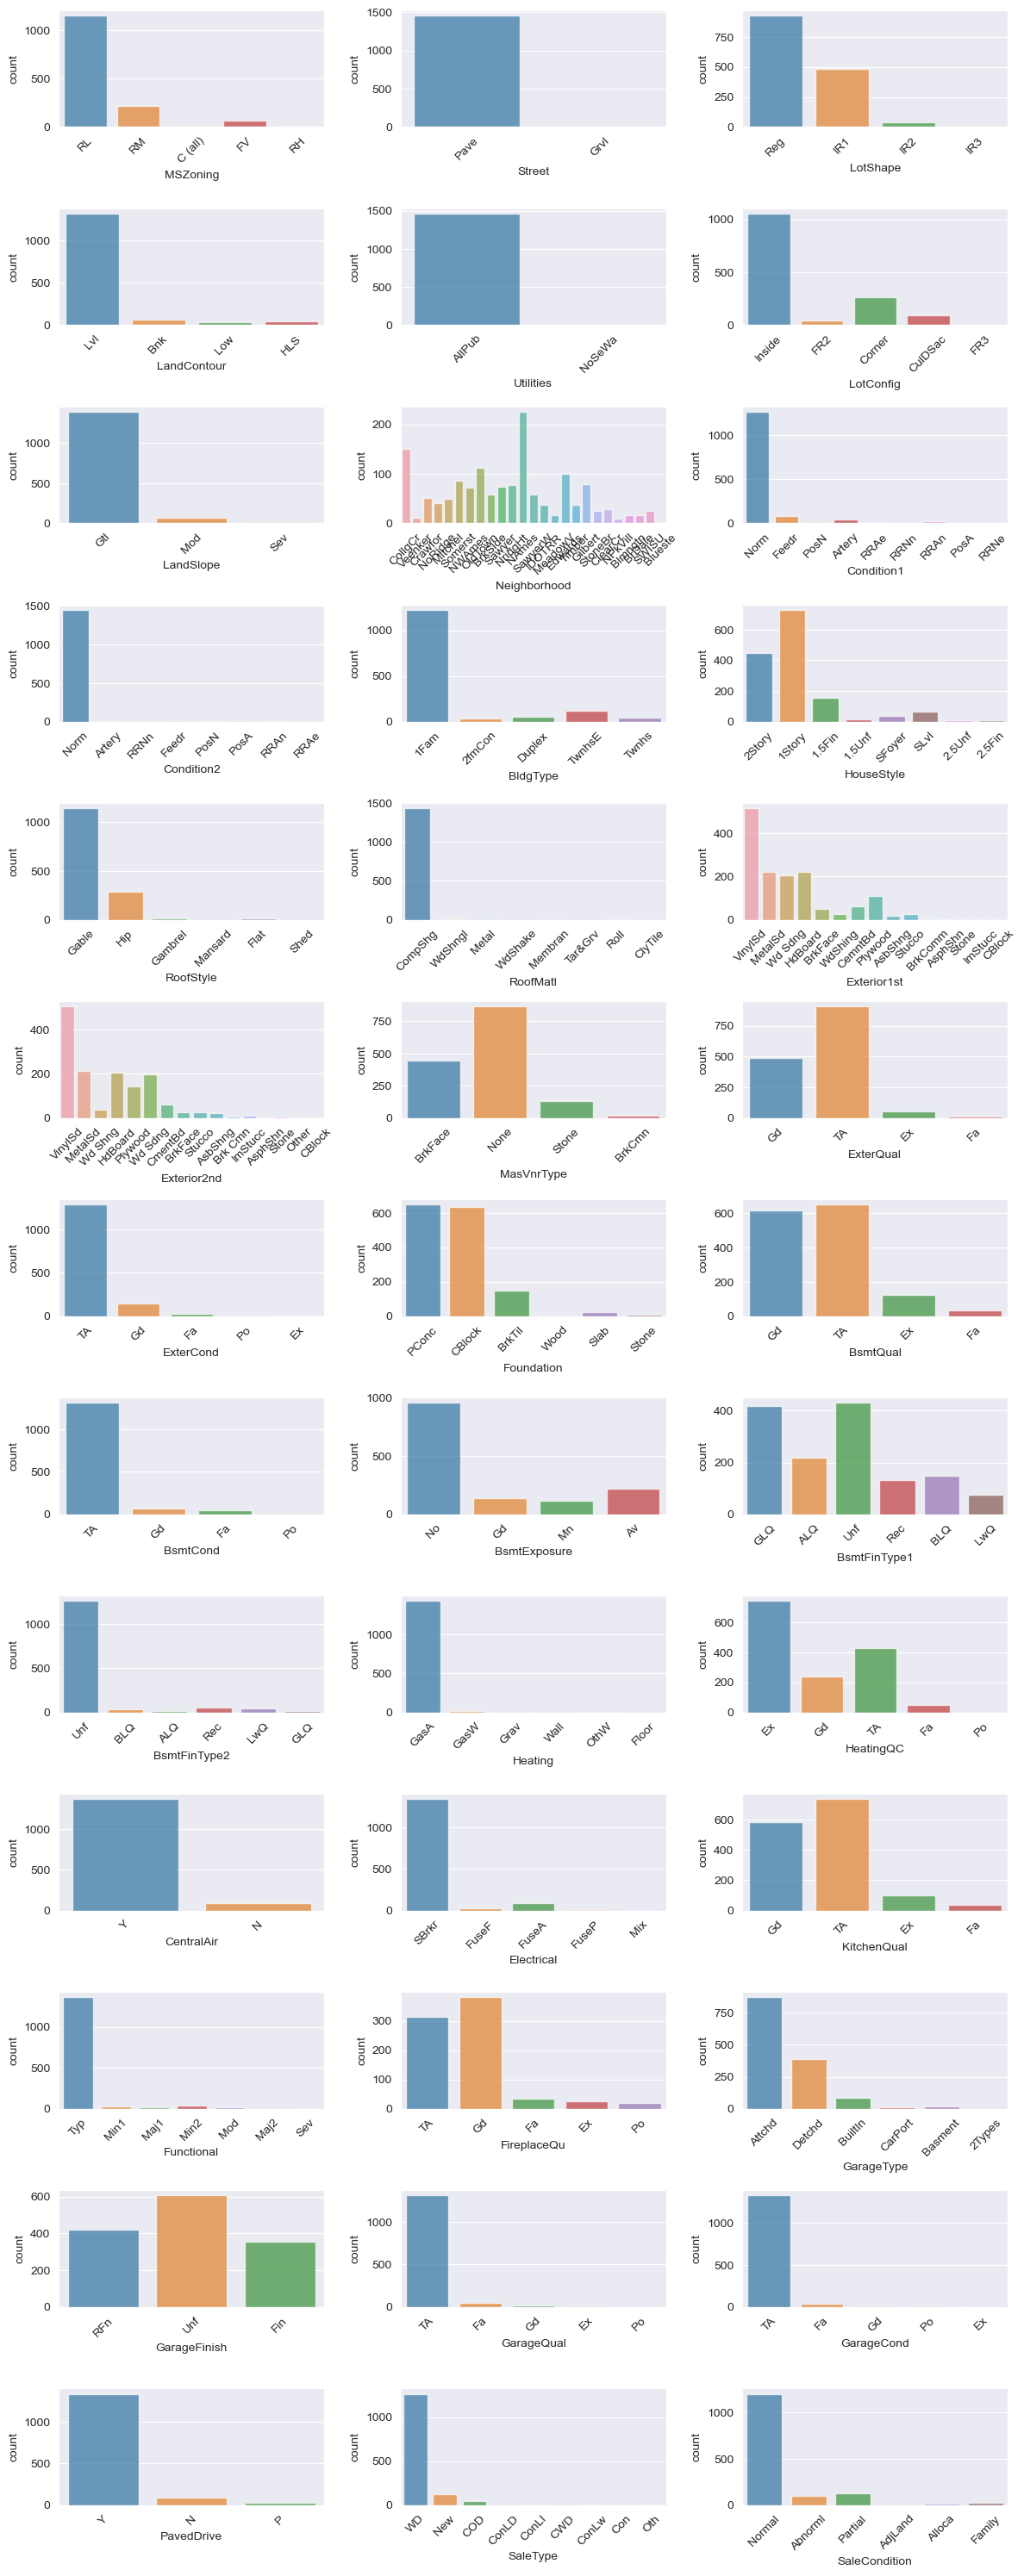

In [67]:
# not_num features distributions

fig, axes = plt.subplots(round(len(df_not_num.columns) / 3), 3, figsize=(12, 30))

for i, ax in enumerate(fig.axes):
    if i < len(df_not_num.columns):
        ax.set_xticklabels(ax.xaxis.get_majorticklabels(), rotation=45)
        sn.countplot(x=df_not_num.columns[i], alpha=0.7, data=df_not_num, ax=ax)

fig.tight_layout()


